In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##**Regression**

In [3]:
df = pd.read_csv('/content/FloridaBikeRentals.csv', encoding = 'latin1') #cp2512, utf-8

In [5]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8102,03/11/2018,0,14,18.1,24,2.4,1594,-2.8,1.97,0.0,0.0,Autumn,No Holiday,No
6753,08/09/2018,956,9,19.9,51,0.6,1906,9.4,1.46,0.0,0.0,Autumn,No Holiday,Yes
8651,26/11/2018,643,11,7.2,66,1.5,542,1.2,1.41,0.0,0.0,Autumn,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
3180,12/04/2018,969,12,17.5,20,4.6,2000,-5.7,3.07,0.0,0.0,Spring,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
#df[num_cols] = df[num_cols].fillna(df[num_cols].mean()) #median
cat_cols = df.select_dtypes(include='object').columns
#df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode())

In [ ]:
df.dtypes

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df.dtypes

In [15]:
df['Day'] = df['Date'].dt.day

In [ ]:
df.columns

In [ ]:
df['Day'].unique()

In [19]:
df['Month'] = df['Date'].dt.month
df['DayofWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayofWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
df.sample(5)

In [ ]:
df.corr(numeric_only=True)

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
plt.figure(figsize=(14, 8))
sns.histplot(df['Rented Bike Count'])#, kde=True)
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sns.distplot(df['Rented Bike Count'])#, kde=True)
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=df[col])
    plt.title(f"Hist Plot of {col}")
    plt.tight_layout()
    plt.show()

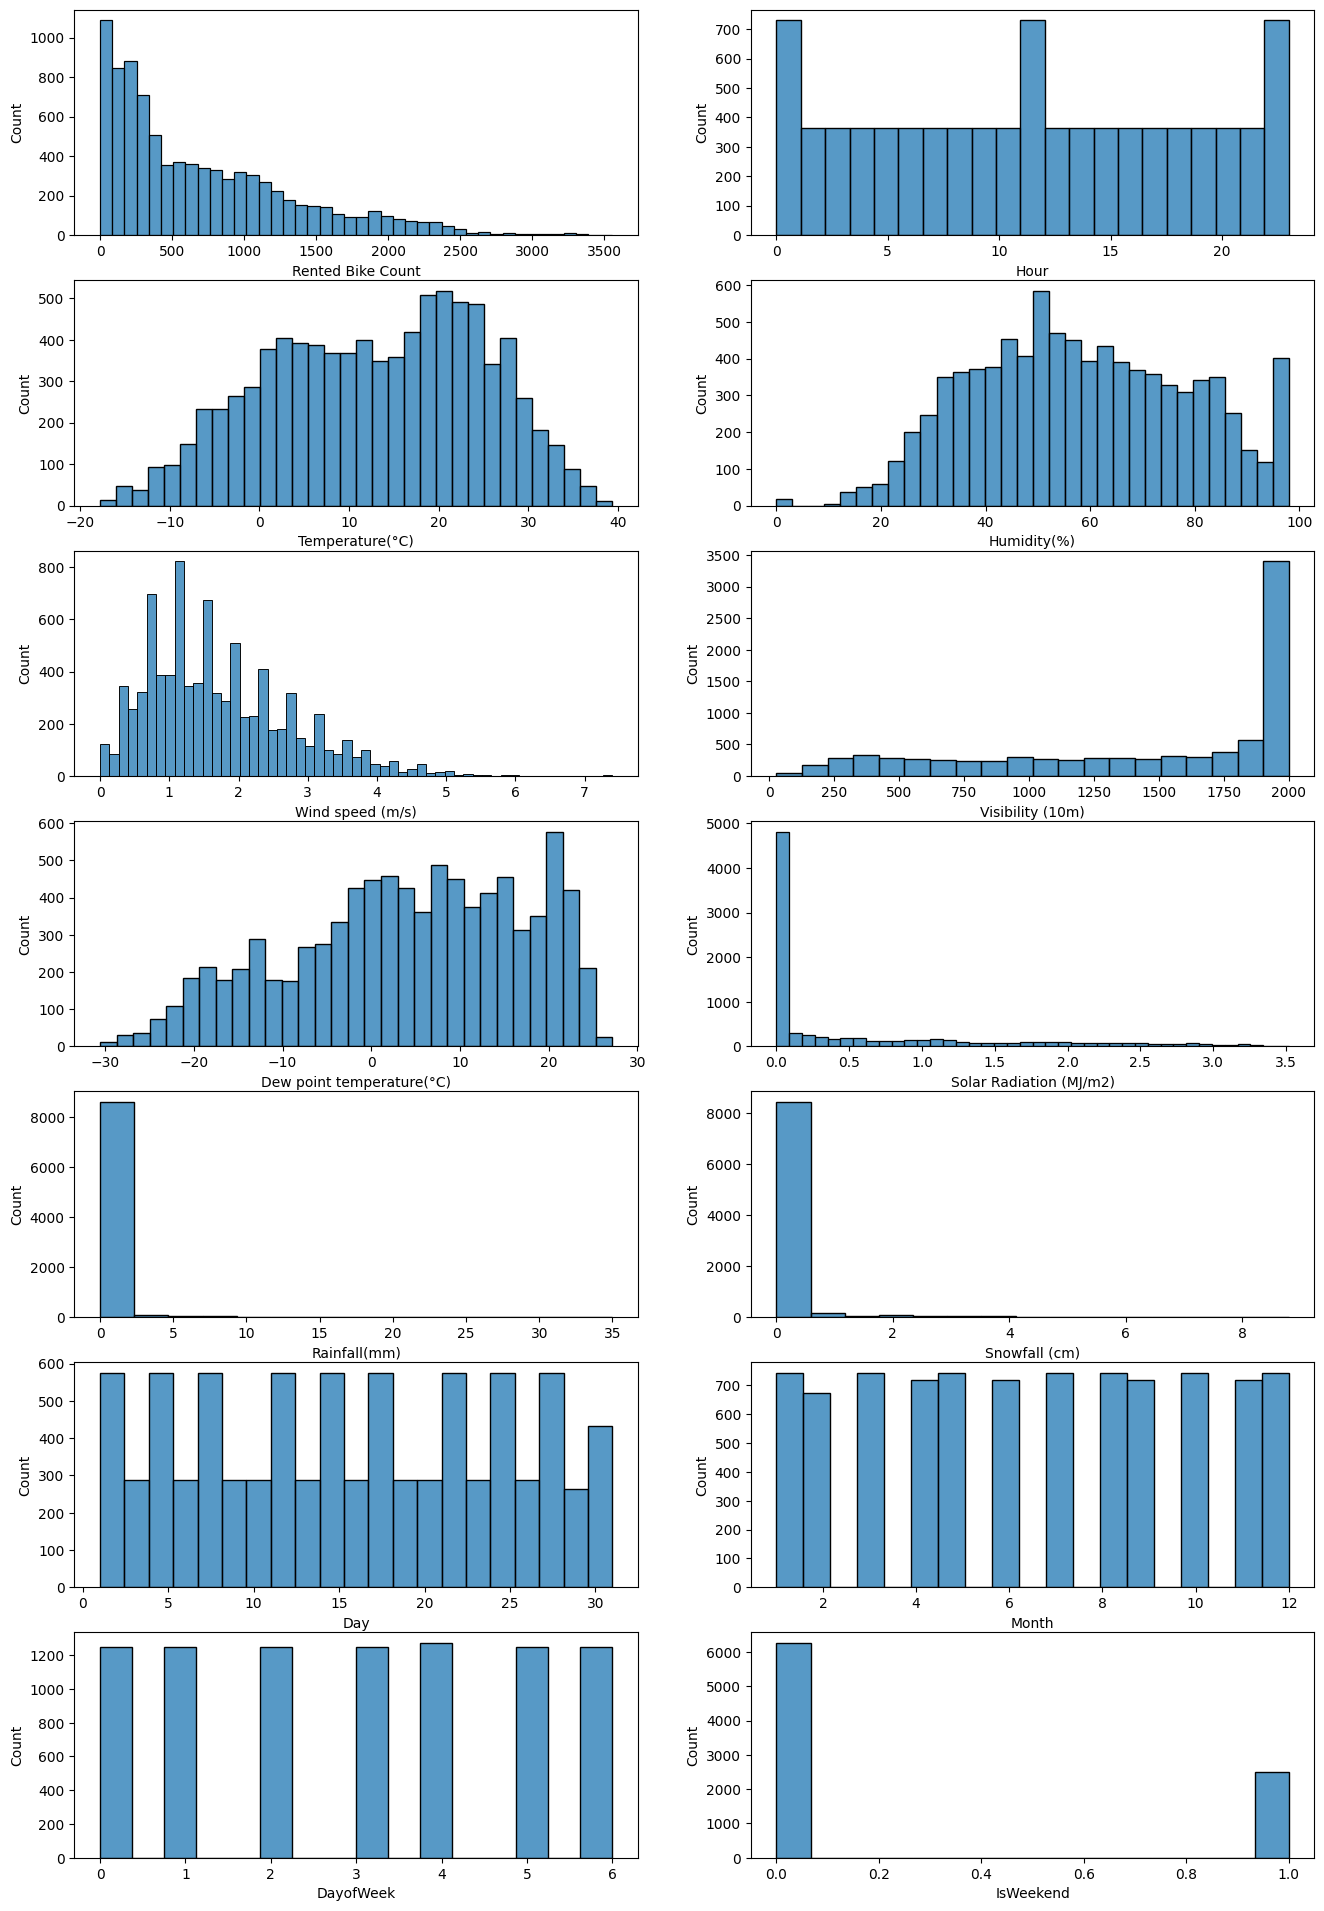

In [37]:
fig, axes = plt.subplots(7, 2, figsize=(16, 24))
axes  = axes.flatten()
num_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(num_cols):
    sns.histplot(x=df[col], ax=axes[i])

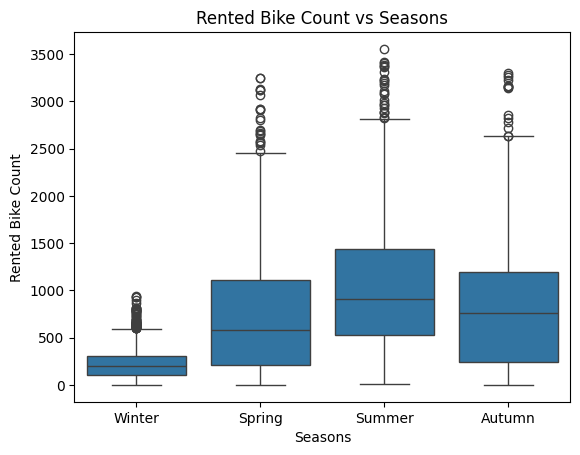

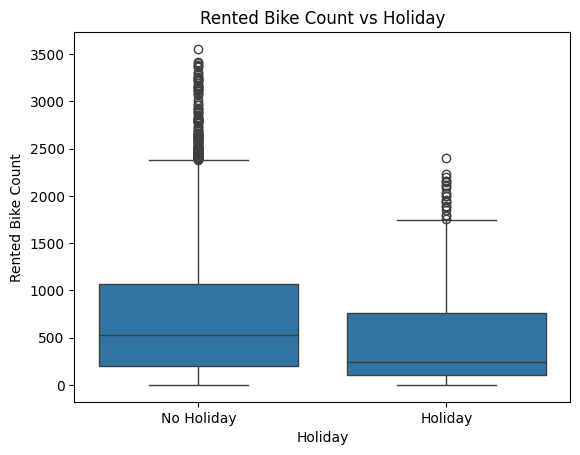

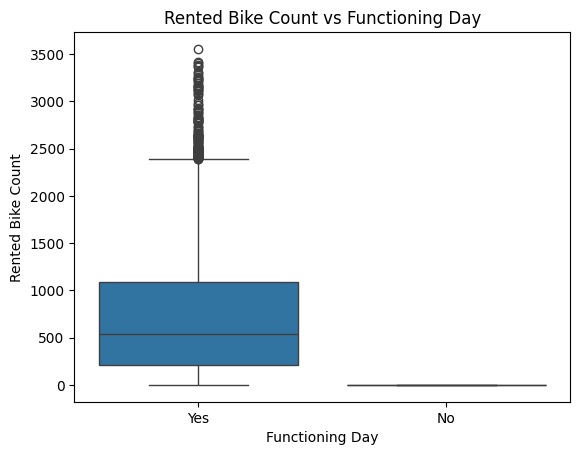

In [43]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    sns.boxplot(x=df[col], y=df['Rented Bike Count'])
    plt.title(f"Rented Bike Count vs {col}")
    plt.show()

In [44]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'DayofWeek', 'IsWeekend'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

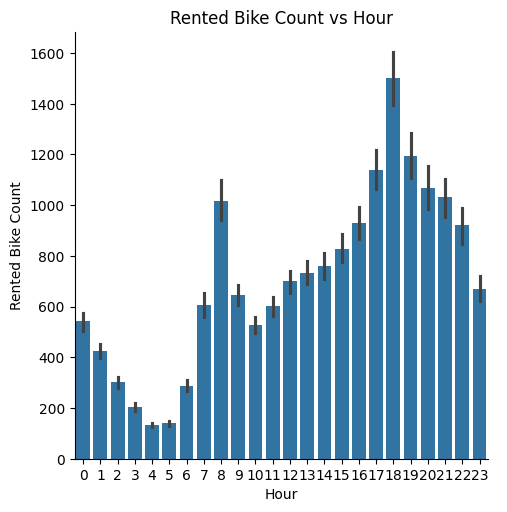

<Figure size 800x600 with 0 Axes>

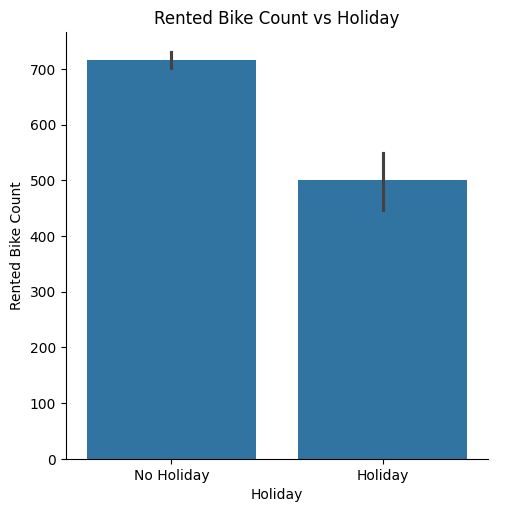

<Figure size 800x600 with 0 Axes>

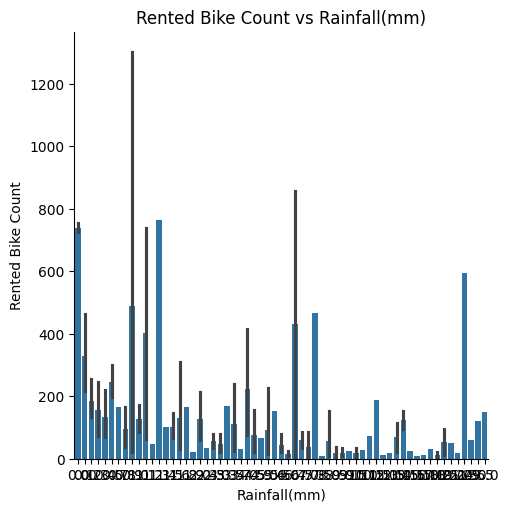

<Figure size 800x600 with 0 Axes>

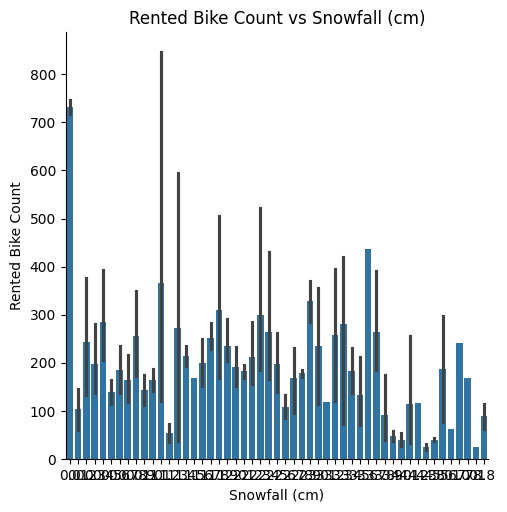

<Figure size 800x600 with 0 Axes>

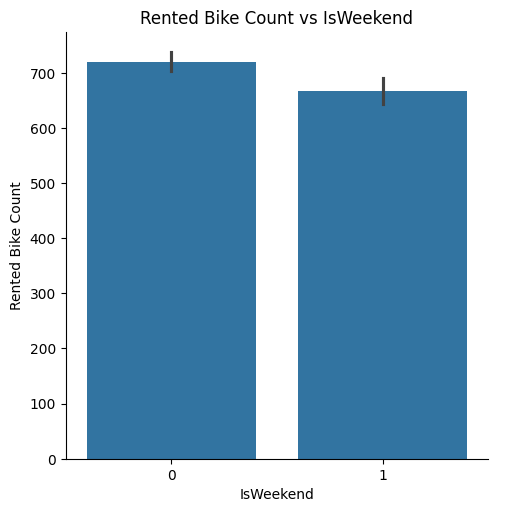

In [45]:
features = ['Hour', 'Holiday', 'Rainfall(mm)', 'Snowfall (cm)', 'IsWeekend']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.catplot(x=feature, y='Rented Bike Count', data=df, kind='bar')
    plt.title(f"Rented Bike Count vs {feature}")
    plt.show()

In [49]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,DayofWeek,IsWeekend
574,2017-12-24,110,22,0.2,69,2.7,565,-4.8,0.00,0.0,0.0,Winter,Holiday,Yes,24,12,6,1
4525,2018-06-07,1071,13,26.7,47,2.4,806,14.4,3.26,0.0,0.0,Summer,No Holiday,Yes,7,6,3,0
1710,2018-02-10,48,6,1.6,78,1.6,448,-1.8,0.00,0.0,0.0,Winter,No Holiday,Yes,10,2,5,1
5544,2018-07-20,1041,0,26.7,80,1.4,1465,22.9,0.00,0.0,0.0,Summer,No Holiday,Yes,20,7,4,0
934,2018-01-08,149,22,0.1,68,4.6,740,-5.1,0.00,0.0,1.0,Winter,No Holiday,Yes,8,1,0,0


In [58]:
df.set_index('Date', inplace=True)

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.sample(5)
df_encoded.shape

In [ ]:
df_encoded1 = pd.get_dummies(df)#, drop_first=True)
df_encoded1.sample(5)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [67]:
x = df_encoded.drop('Rented Bike Count', axis=1)
y = df_encoded['Rented Bike Count']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) #train_size=0.8

In [69]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_pred = lr.predict(x_test_scaled)

lr_r2 = r2_score(y_test, lr_pred)
lr_r2

0.551132785235908

In [71]:
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
lasso_pred = lasso.predict(x_test_scaled)
lasso_r2 = r2_score(y_test,lr_pred)
lasso_r2

0.551132785235908

In [72]:
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_rd = ridge.predict(x_test_scaled)
rd_r2 = r2_score(y_test,y_pred_rd)
rd_r2

0.5511657147319171

In [73]:
elastic = ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_pred_el = elastic.predict(x_test_scaled)
el_r2 = r2_score(y_test,y_pred_el)
el_r2

0.5024180431219142

In [78]:
models = {
    'Linear Regression': lr,
    'Lasso Regression' : lasso,
    'Ridge Regression' : ridge,
    'ElasticNet Regression' : elastic
}

for name, model in models.items():
    print(f'{name}')
    y_pred_model = model.predict(x_test_scaled)
    print('R2 Score: ', r2_score(y_test, y_pred_model))
    print('MAE: ', mean_absolute_error(y_test, y_pred_model))
    print('MSE: ', mean_squared_error(y_test, y_pred_model))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_model)))
    print('-*-')

Linear Regression
R2 Score:  0.551132785235908
MAE:  320.9669046881625
MSE:  185512.5922920386
RMSE:  430.71172759983983
-*-
Lasso Regression
R2 Score:  0.5513117922979739
MAE:  320.8857450865313
MSE:  185438.61035923052
RMSE:  430.62583568479783
-*-
Ridge Regression
R2 Score:  0.5511657147319171
MAE:  320.9580640908507
MSE:  185498.9828414782
RMSE:  430.6959285174149
-*-
ElasticNet Regression
R2 Score:  0.5024180431219142
MAE:  327.0857537975133
MSE:  205645.93639727638
RMSE:  453.482013311748
-*-


##**Classification**

In [2]:
df = pd.read_csv('/content/adultcensusincome.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [5]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
sex,object
capital.gain,int64


In [6]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
df.isnull().any()

,0
age,False
workclass,False
fnlwgt,False
education,False
education.num,False
marital.status,False
occupation,False
relationship,False
sex,False
capital.gain,False


In [8]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
sex,0
capital.gain,0


In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.head(10)

In [12]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.head(10)

In [14]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
sex,0
capital.gain,0


In [15]:
df['workclass'].unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
df['occupation'].unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [19]:
df['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [20]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['income'].unique()

In [29]:
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


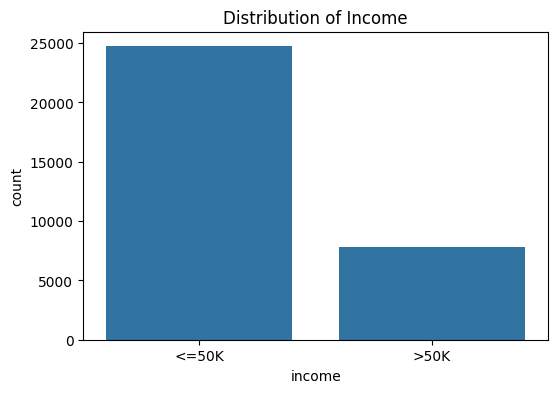

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title("Distribution of Income")
plt.show()

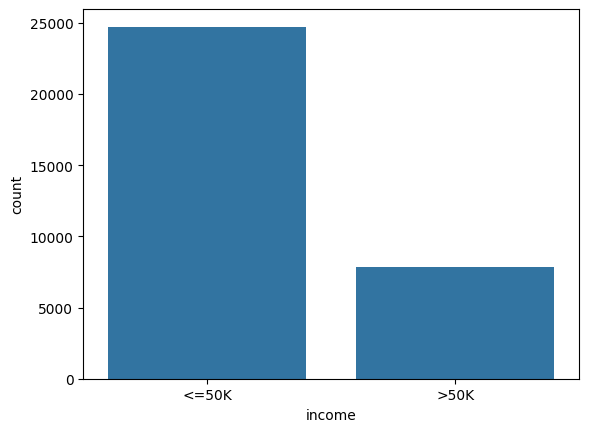

In [31]:
sns.barplot(df["income"].value_counts())
plt.show()

In [ ]:
plt.hist(df['age'])
plt.show()

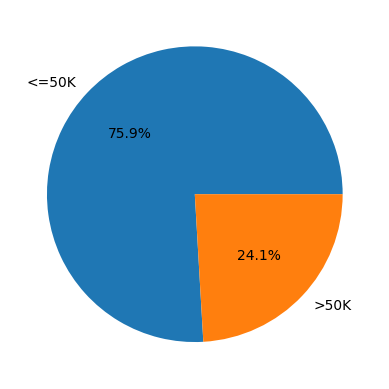

In [33]:
plt.pie(df['income'].value_counts(), labels=df['income'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
df["education.num"].value_counts().sort_index().plot(kind="bar")
plt.title("Years of Education (education.num)")
plt.xlabel("education.num")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
plt.pie(df['marital.status'].value_counts(), labels=df['marital.status'].unique(), autopct='%1.1f%%')
plt.show()

In [40]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87])

In [42]:
df['age'].min()

17

In [43]:
df['age'].max()

90

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0,25,45,65,100])
sns.countplot(x='age_group', hue='income', data=df)
plt.title("Income vs Age Group")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='income', data=df)
plt.title("Income vs Education")
plt.show()

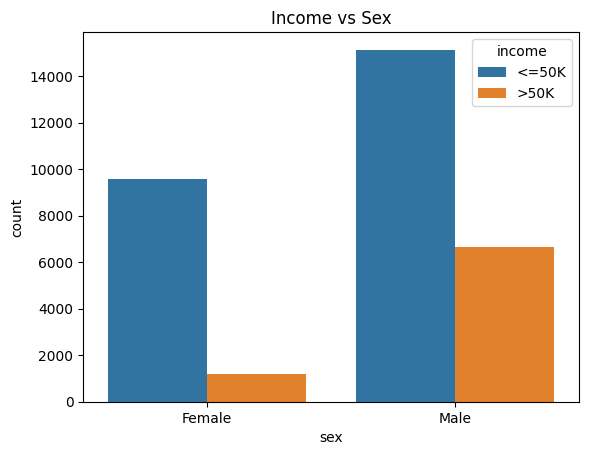

In [46]:
sns.countplot(x='sex', hue='income', data=df)
plt.title("Income vs Sex")
plt.show()

In [47]:
df_corr = df.copy()
df_corr['income'] = df_corr['income'].map({'<=50K':0, '>50K':1})
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Private'

<Figure size 1200x800 with 0 Axes>

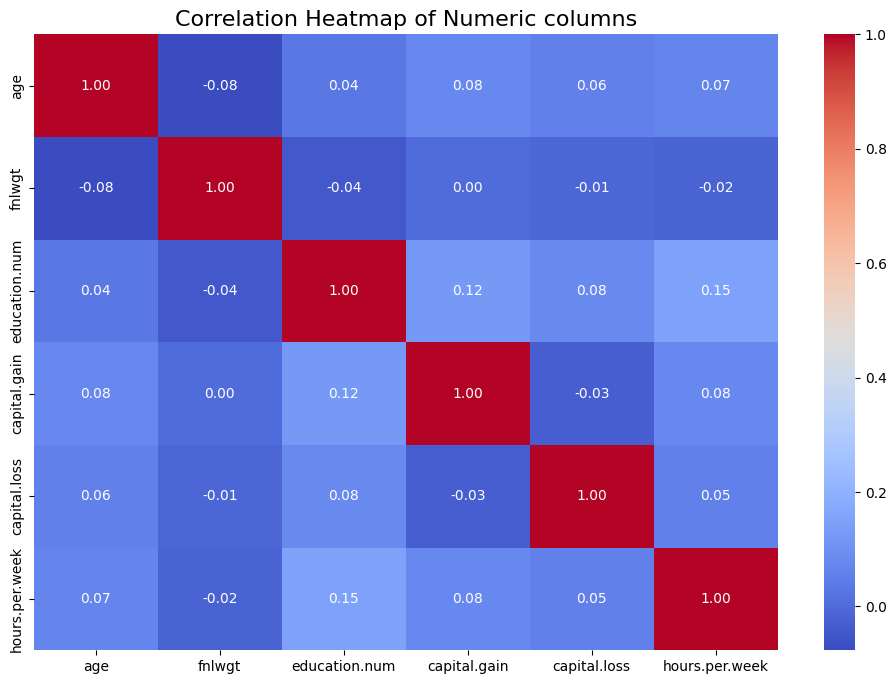

In [48]:
numeric_cols_df = df.select_dtypes(include=["int64","float64"])
correlation_matrix = numeric_cols_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric columns", fontsize=16)
plt.show()